# Linear Regression

In [1]:
def train_linear_regression(X, y):
    # Adding the bias term
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # XTX is a square matrix that represents the relantionship 
    # between features
    XTX = X.T.dot(X)
    
    # with the inverse matrix we can calculate the weights (w) that will
    # minimize the "mean squared error" in the linear regression model
    XTX_inv = np.linalg.inv(XTX)
    
    # compute the optimal weights for the linear regression model using the least squares method.
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## What's the purpose of the bias term?
In linear regression, we typically extend our feature matrix X by adding a column of ones (the bias term) to account for the intercept. 

This allows us to represent the linear equation in matrix form <b>y = w0 + X*w</b>, where <b>w0</b> is the bias term, <b>X</b> is the feature matrix, <b>w</b> is the weight vector, and <b>y</b> is the target vector.

## Visualizing the use of the bias term

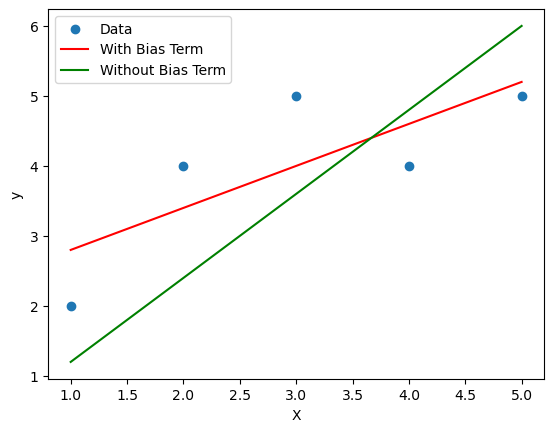

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Linear regression with bias term
ones = np.ones(X.shape[0])
X_with_bias = np.column_stack([ones, X])

XTX_with_bias = X_with_bias.T.dot(X_with_bias)
XTX_with_bias_inv = np.linalg.inv(XTX_with_bias)
w_with_bias = XTX_with_bias_inv.dot(X_with_bias.T).dot(y)
y_pred_with_bias = X_with_bias.dot(w_with_bias)

# Linear regression without bias term
X_no_bias = X.reshape(-1, 1)

XTX_no_bias = X_no_bias.T.dot(X_no_bias)
XTX_no_bias_inv = np.linalg.inv(XTX_no_bias)
w_no_bias = XTX_no_bias_inv.dot(X_no_bias.T).dot(y)
y_pred_no_bias = X_no_bias.dot(w_no_bias)

# Plot the data and regression lines
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred_with_bias, label='With Bias Term', color='red')
plt.plot(X, y_pred_no_bias, label='Without Bias Term', color='green')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


The bias term (also known as the intercept term) in linear regression is an additional parameter that represents the y-intercept of the linear model. 

When you don't use the bias term in linear regression, <b>the model is forced to go through the origin (0,0)</b> in the feature space and this generates some side effects in linear regression model:

<b>Forced Through the Origin:</b>
Without the bias term, the linear regression model is forced to go through the origin (0,0) in the feature space. This means the model assumes that when all features are zero, the target variable is also zero.

<b>Limited Model Flexibility:</b>
The model's flexibility and expressiveness are limited because it can only represent linear relationships <b>that pass through the origin.</b> In many real-world scenarios, a linear relationship that necessarily passes through the origin is not appropriate or realistic.

<b>Misleading Predictions:</b>
The model may make inaccurate predictions, especially when the true relationship between the features and the target variable does not pass through the origin. This can result in biased predictions and poor model performance.

<b>Increased Sensitivity to Data:</b>
The model can become overly sensitive to variations in the data, particularly if the data is not well-centered around the origin. Small changes in the data can lead to significant changes in the model parameters, making it less stable.

<b>Violating Assumptions:</b>
Linear regression assumes that the expected value of the target variable is a linear combination of the features. By not using a bias term, this assumption is violated, which can lead to biased and inconsistent parameter estimates.

# RMSE - Root Mean Squared Error

RMSE is a metric to evaluate the accuracy of preditions made by a model, particularly in regression tasks like linear regression. It provides a measure of how well the predicted values match the true (observed) values.

A lower RMSE indicates that the model's predictions <b>are closer to the actual observed values</b>, reflecting better performance. Conversely, a higher RMSE means that the model's predictions are further from the actual values, indicating poorer performance.

RMSE is a widely used evaluation metric because it penalizes larger errors more significantly due to the squaring operation. It provides a clear and interpretable measure of the model's prediction accuracy and helps in comparing different models or tuning model parameters to achieve better predictions.

In [4]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Defining the features to use from dataset

When preparing data to create features for a model, selecting the appropriate columns (features) is a critical step in the machine learning pipeline. The choice of features greatly influences the model's performance and effectiveness. Here are important considerations to guide you in selecting the right columns for your model:

1. **Relevance to the Problem**:
   - Include columns that are directly related to the problem you are trying to solve. Irrelevant features can introduce noise and hinder model performance.  
  
2. **Domain Knowledge**:
   - Leverage domain expertise to identify potentially important features. Understanding the domain can help you select meaningful features that contribute to the model's accuracy.

3. **Correlation Analysis**:
   - Investigate the correlation between features and the target variable. Include features that exhibit a strong correlation with the target variable, as they are likely to be predictive.


4. **Collinearity**:
   - Check for collinearity (high correlation) among features. Highly correlated features may not add much additional information to the model, so you might choose to keep only one of them.

5. **Feature Importance**:
   - Utilize feature importance techniques (e.g., tree-based models, permutation importance) to rank features based on their contribution to the model's prediction.

6. **Dimensionality Reduction**:
   - If you have a large number of features, consider using dimensionality reduction techniques (e.g., PCA) to reduce the number of features while preserving essential information.

7. **Information Gain and Entropy**:
   - Calculate information gain or entropy to determine the information provided by each feature in classifying instances. Higher information gain suggests more valuable features.

8. **Missing Values**:
   - Evaluate the amount of missing data in each column. If a significant portion of a column's data is missing, consider excluding it or imputing the missing values.

9. **Outliers**:
   - Check for outliers in the data and decide whether to include or handle them appropriately for each feature.

10. **Feature Scaling and Normalization**:
    - Ensure that features are scaled and normalized appropriately to bring them to a similar scale and prevent certain features from dominating the model.

11. **Historical Performance and Feedback**:
    - Consider the performance of previous models and any feedback received regarding feature relevance. Learn from past experiences to improve feature selection.

12. **Computational Resources**:
    - Consider the computational resources available for training the model. Including a large number of features may increase the complexity and training time.

13. **Practicality and Feasibility**:
    - Consider the practicality and feasibility of collecting and utilizing certain features. Some features may be difficult or expensive to obtain, which could influence your decision to include them.

14. **User Input and Stakeholder Requirements**:
    - Incorporate feedback from end-users or stakeholders regarding features they believe are important for the model to consider.

By carefully considering these aspects, you can select the most relevant and informative features for training your machine learning model, ultimately improving its performance and predictive accuracy.

# Regularization

